# Causal Learning
In this notebook, I will first create a causal graph that represet the causal relation between the variables in the data.
And then I will train a model on a selected subset of my variable. 
The specific steps will look like as follows:
1. Split data into training and hold-out set 
2. Create a causal graph using all training data and get the insights (this will be considered the ground truth)
3. Create new causal graphs using increasing fractions of the data and compare with the ground truth graph
   * The comparison can be done with a Jaccard Similarity Index, measuring the intersection and union of the graph edges
4. After reaching a stable causal graph, select only variables that point directly to the target variable
5. Train one model using all variables and another using only the variables selected by the graph
6. Measure how much each of the models overfit the hold-out set created in step 1.

# Import libraries

In [1]:
import sys
sys.path.append("../scripts/")

from sklearn.model_selection import train_test_split

# custom modules import
from fetch_data import DataLoader
from visualization import Plotters
from causal_graph import CausalGraph



# plotters = Plotters(w=10, h=10)

/home/hat/miniconda3/envs/causality/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the data

In [2]:
loader = DataLoader()

struct_data = loader.dvc_get_data(path="./data/data.csv",
                                  version="cleaned_data",
                                  repo="../")



DVC: CSV file read with path: ./data/data.csv | version: cleaned_data | from: ../


# Step-1: Split into training and hold-out sets

In [3]:
train_set, holdout_set = train_test_split(struct_data, test_size=0.3)
print(f"Train set shape: {train_set.shape}\nHoldout set shape: {holdout_set.shape}")

Train set shape: (398, 31)
Holdout set shape: (171, 31)


From now on, I will be using the `train_set` dataframe.

In [4]:
# train_set.columns

# Step-2: Create a causal graph using all of the train_set

In [5]:
ts_all_cg = CausalGraph(train_set)
# ts_all_cg.learn_graph(w_threshold=0.8)
# Save graph
# ts_all_cg.save_graph("baseline.dot")
ts_all_cg.read_graph("baseline.dot")

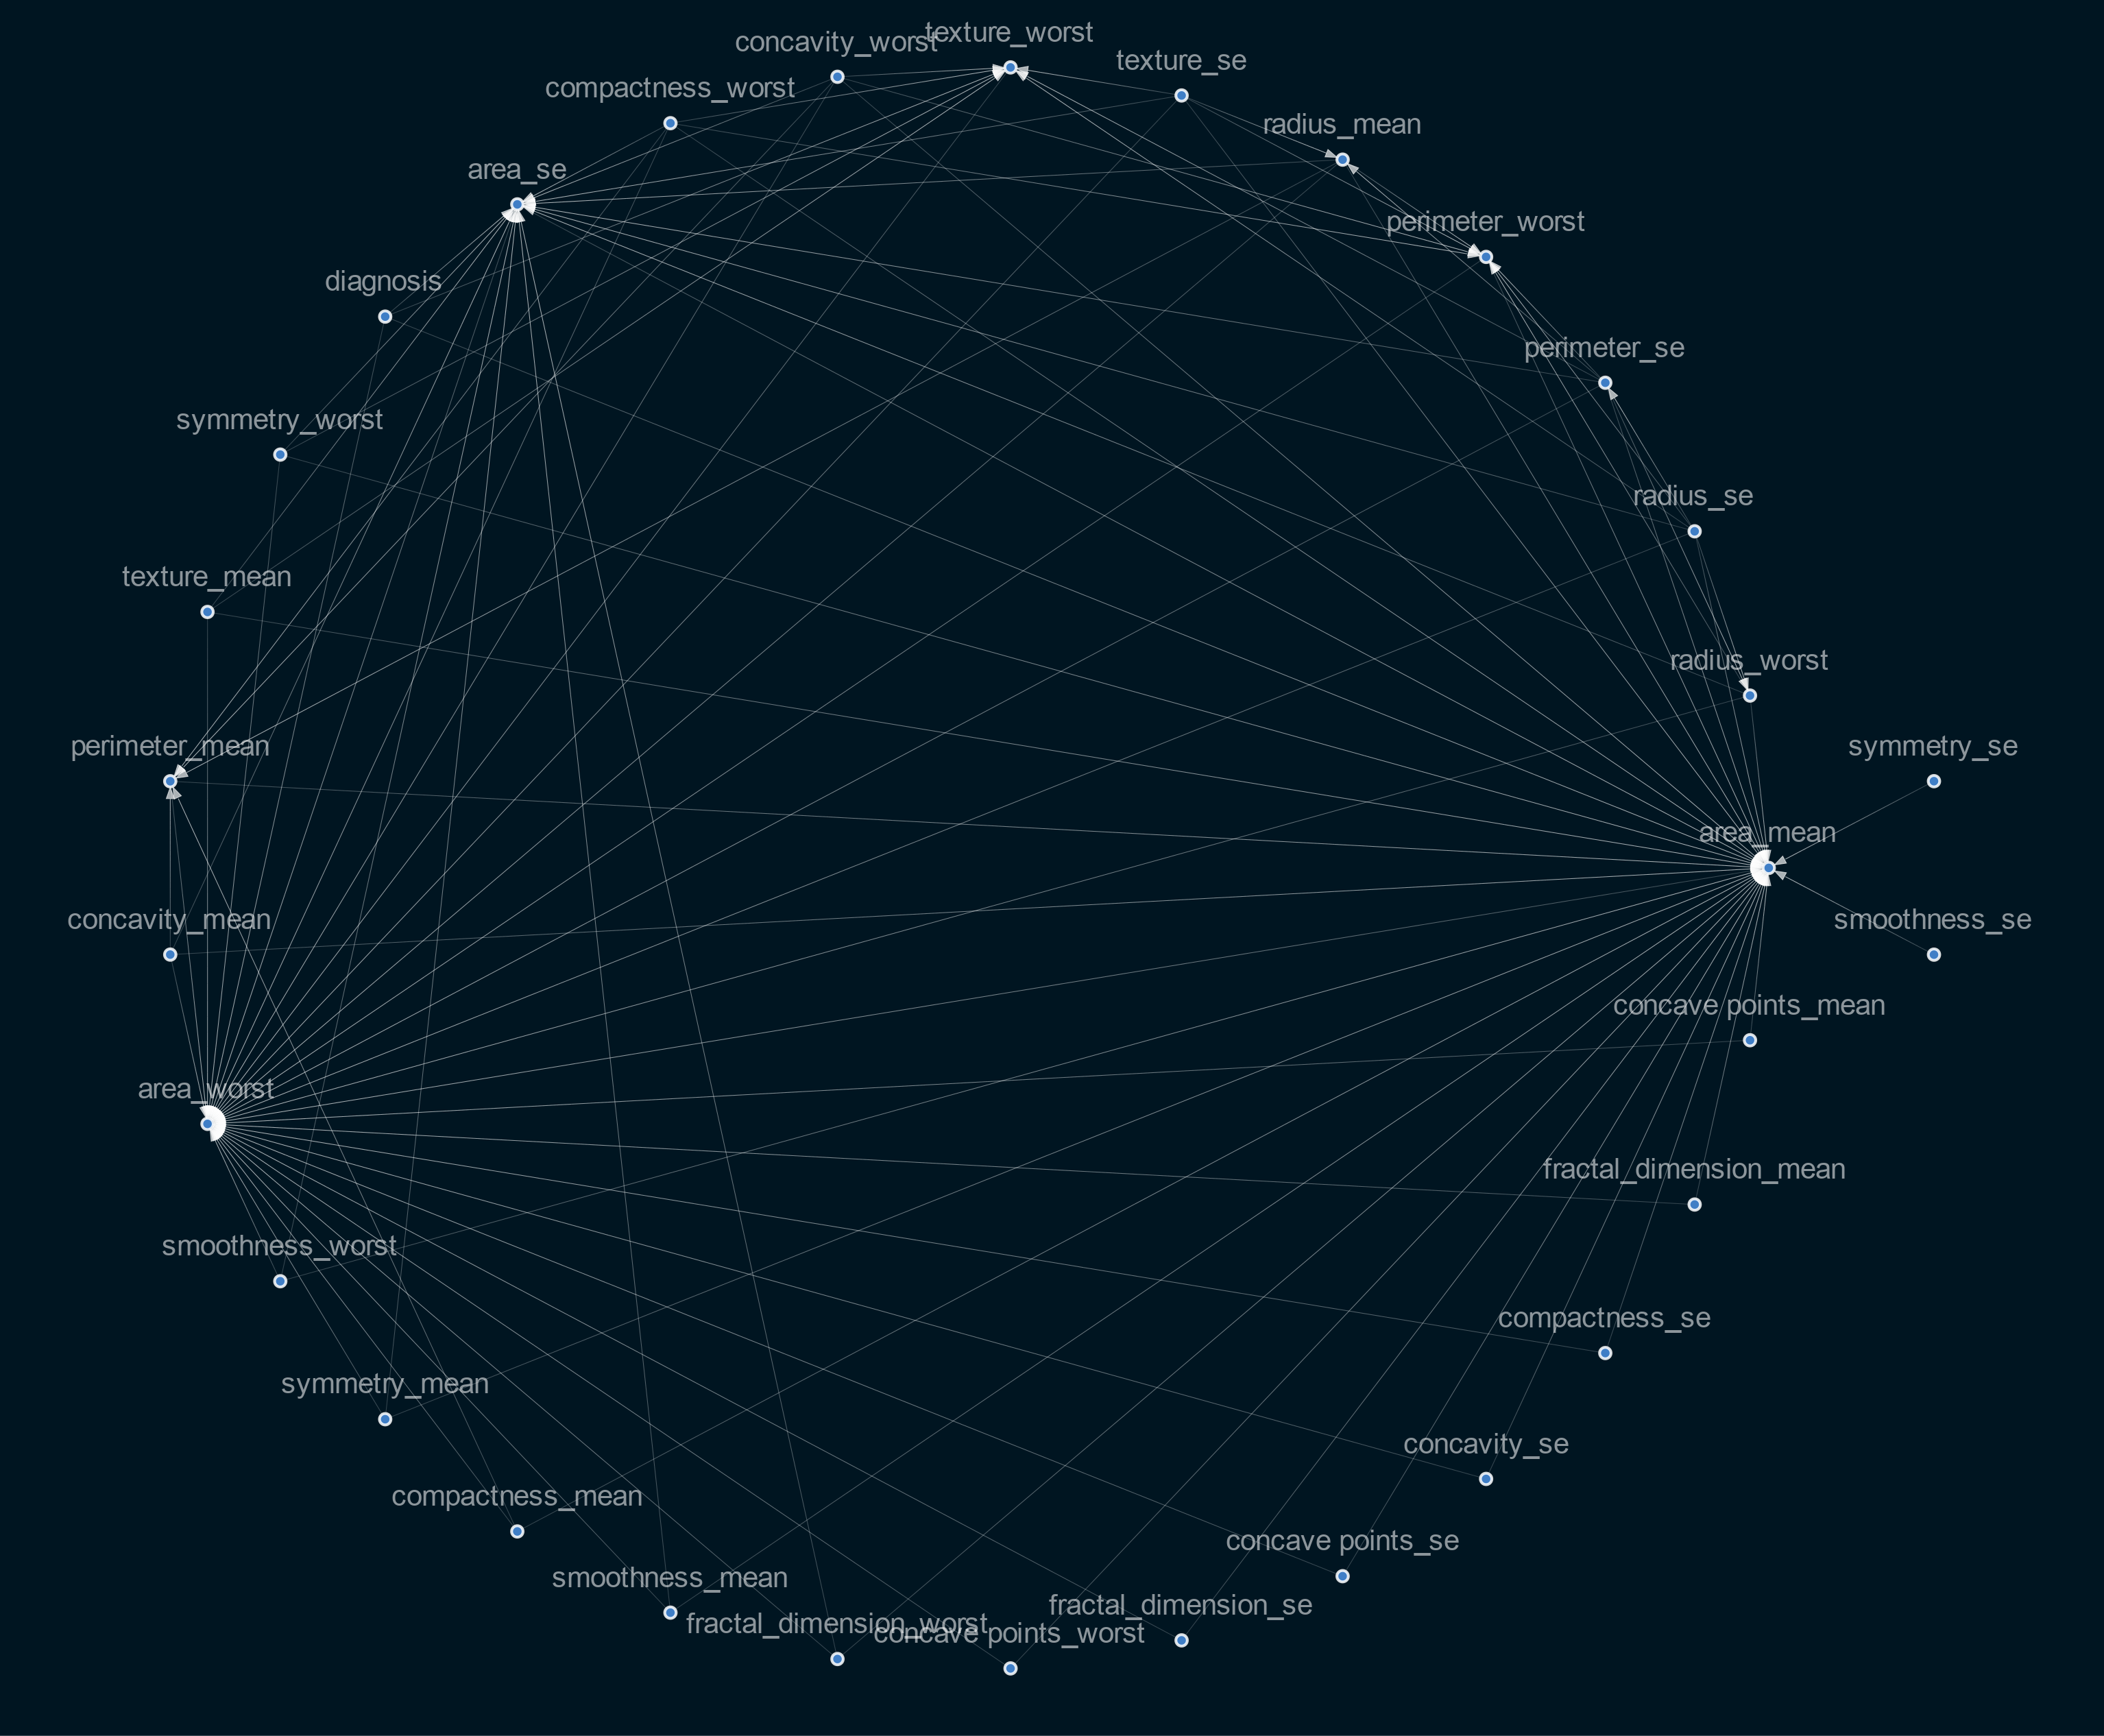

In [6]:
ts_all_cg.show_graph(size=50, scale=0.8, prog="circo", image_name="all_cols_100_pct")

# Step-3: Create new causal graphs using increasing fractions of the data and compare with the ground truth graph


In [7]:
train_set_len = len(train_set)

## with 40%

In [8]:
fourty_pct = int(train_set_len * 0.4)
fourty_cg = CausalGraph(train_set.iloc[:fourty_pct, :])
# fourty_cg.learn_graph()
# fourty_cg.save_graph("1_causal_graph_with_fourty_pct.dot")
fourty_cg.read_graph("1_causal_graph_with_fourty_pct.dot")


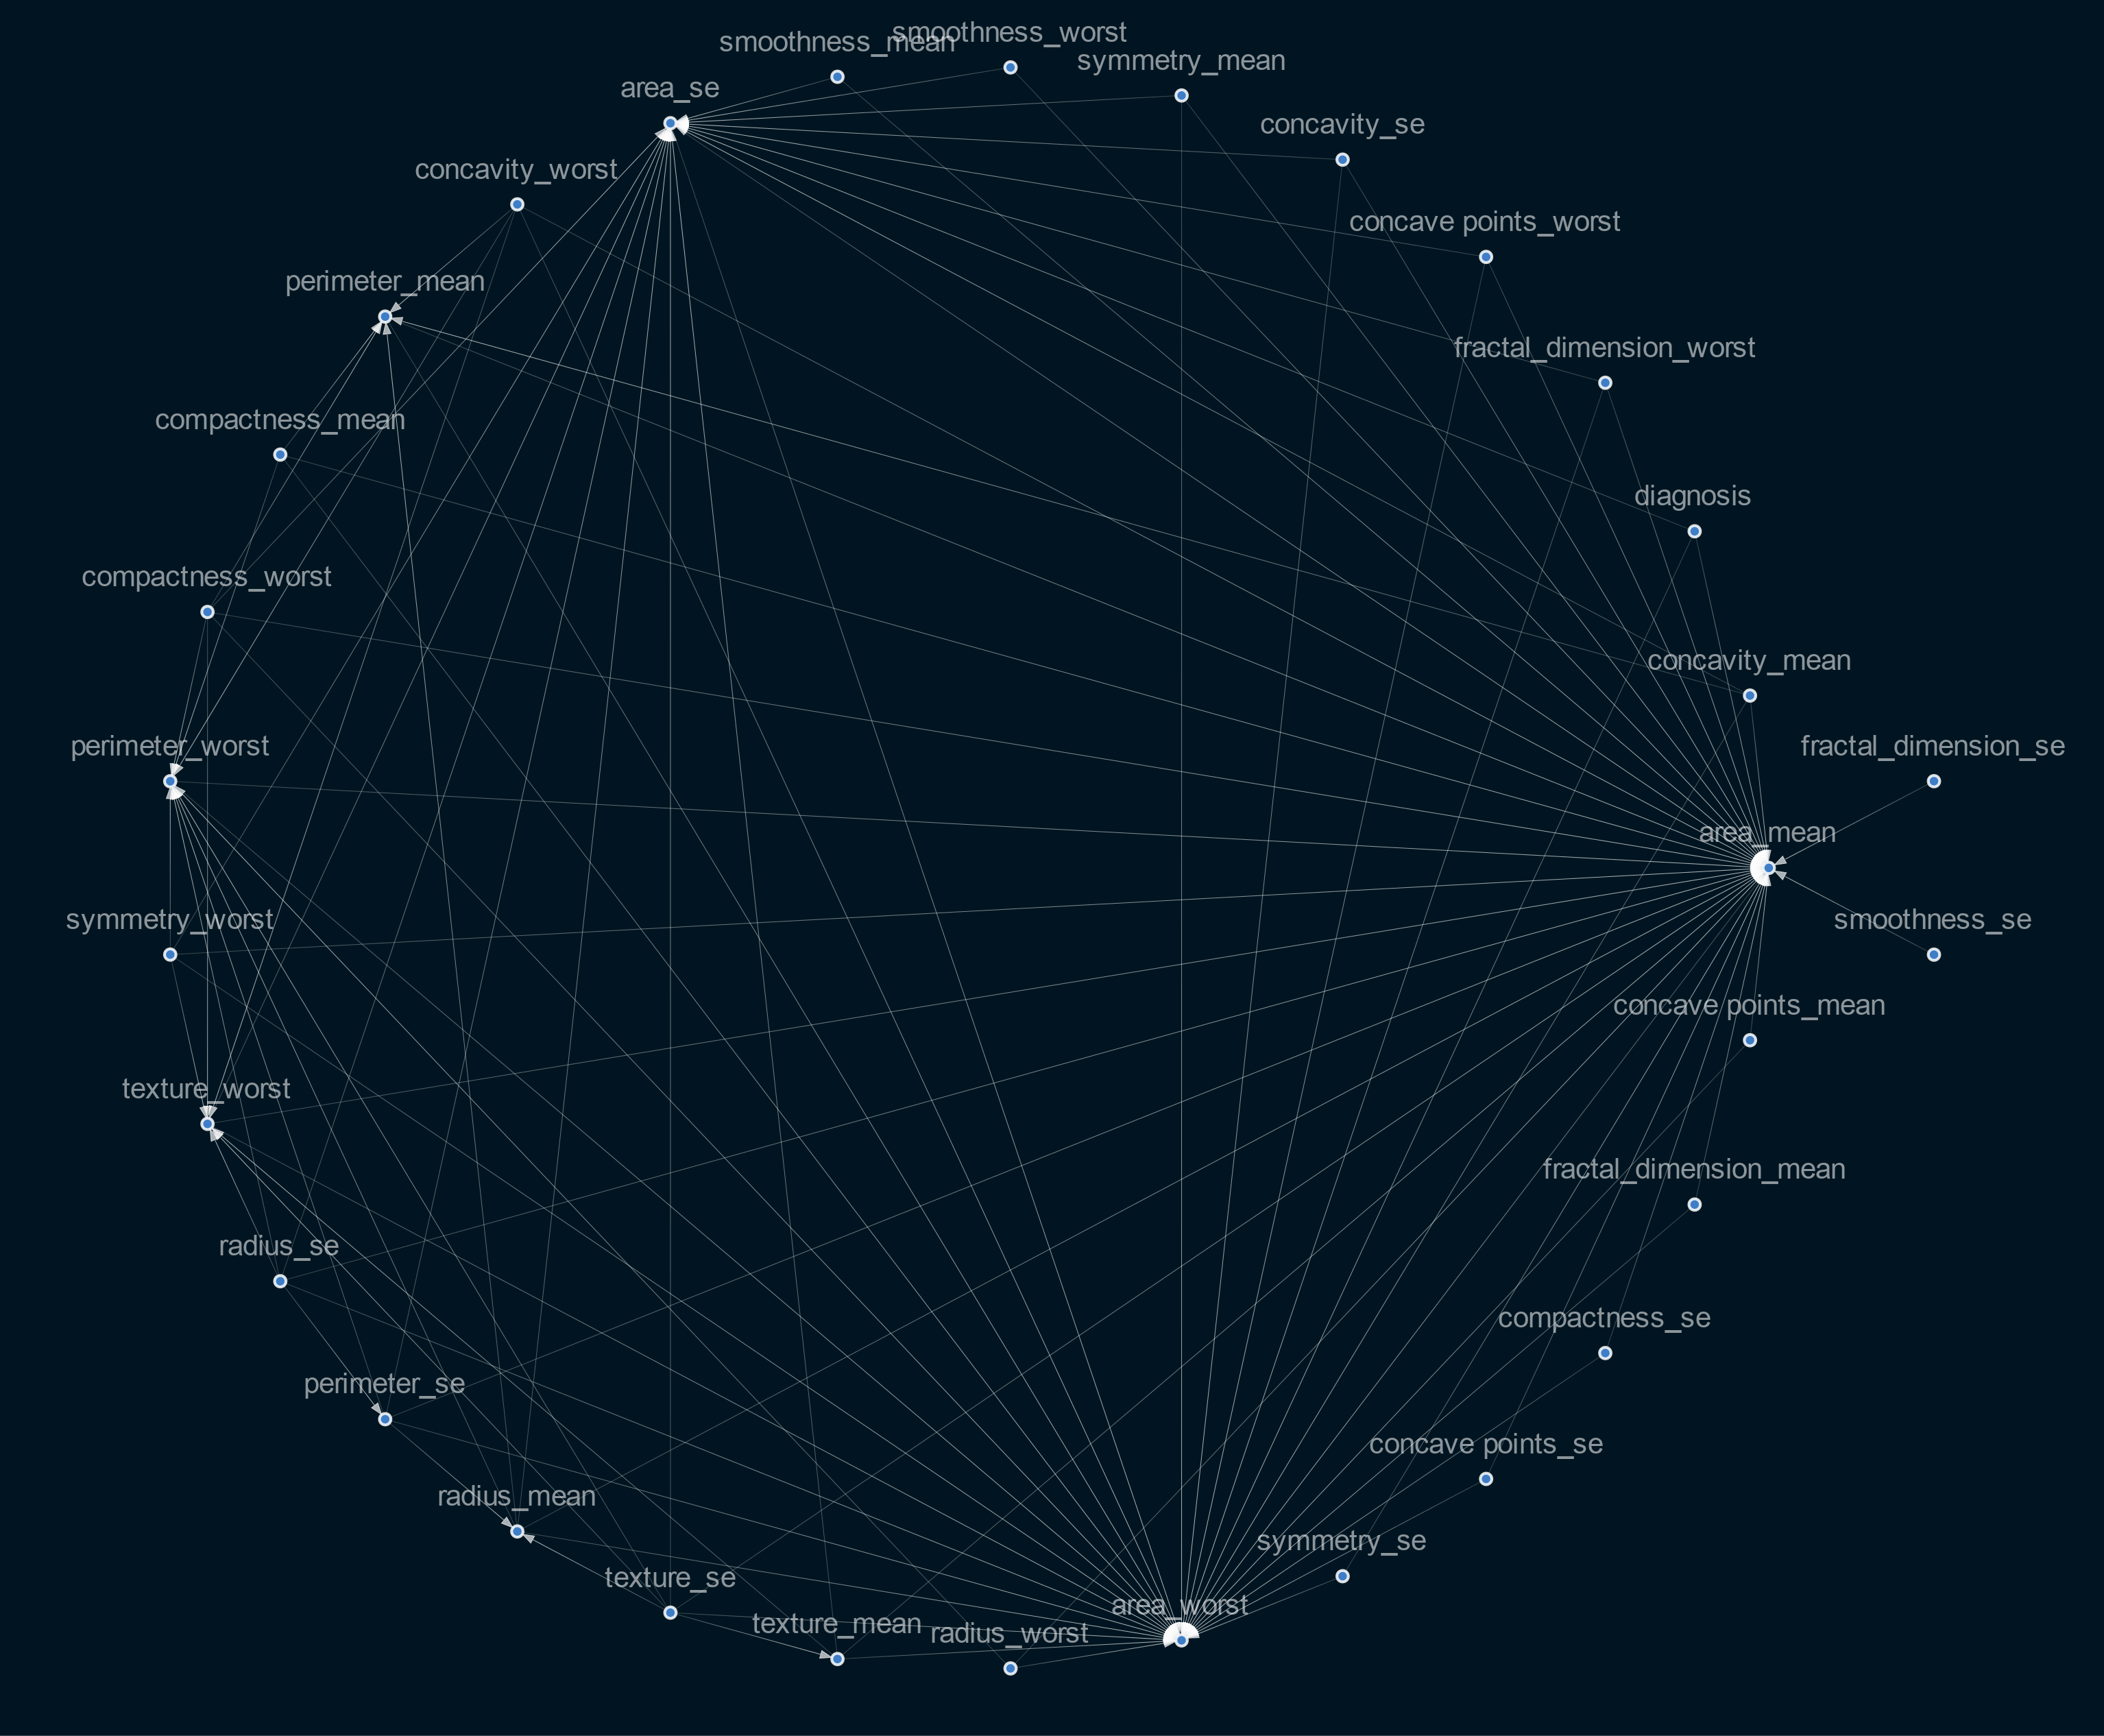

In [9]:
fourty_cg.show_graph(size=50, scale=0.8, prog="circo", image_name="all_cols_40_pct")

### calculate difference with baseline graph

In [10]:
CausalGraph.jaccard_similarity(ts_all_cg.sm.edges, fourty_cg.sm.edges)

0.837

## with 70%

In [11]:
seventy_pct = int(train_set_len * 0.7)
seventy_cg = CausalGraph(train_set.iloc[:seventy_pct, :])
# seventy_cg.learn_graph(w_threshold=0.8)
# seventy_cg.save_graph("2_causal_graph_with_seventy_pct.dot")
seventy_cg.read_graph("2_causal_graph_with_seventy_pct.dot")


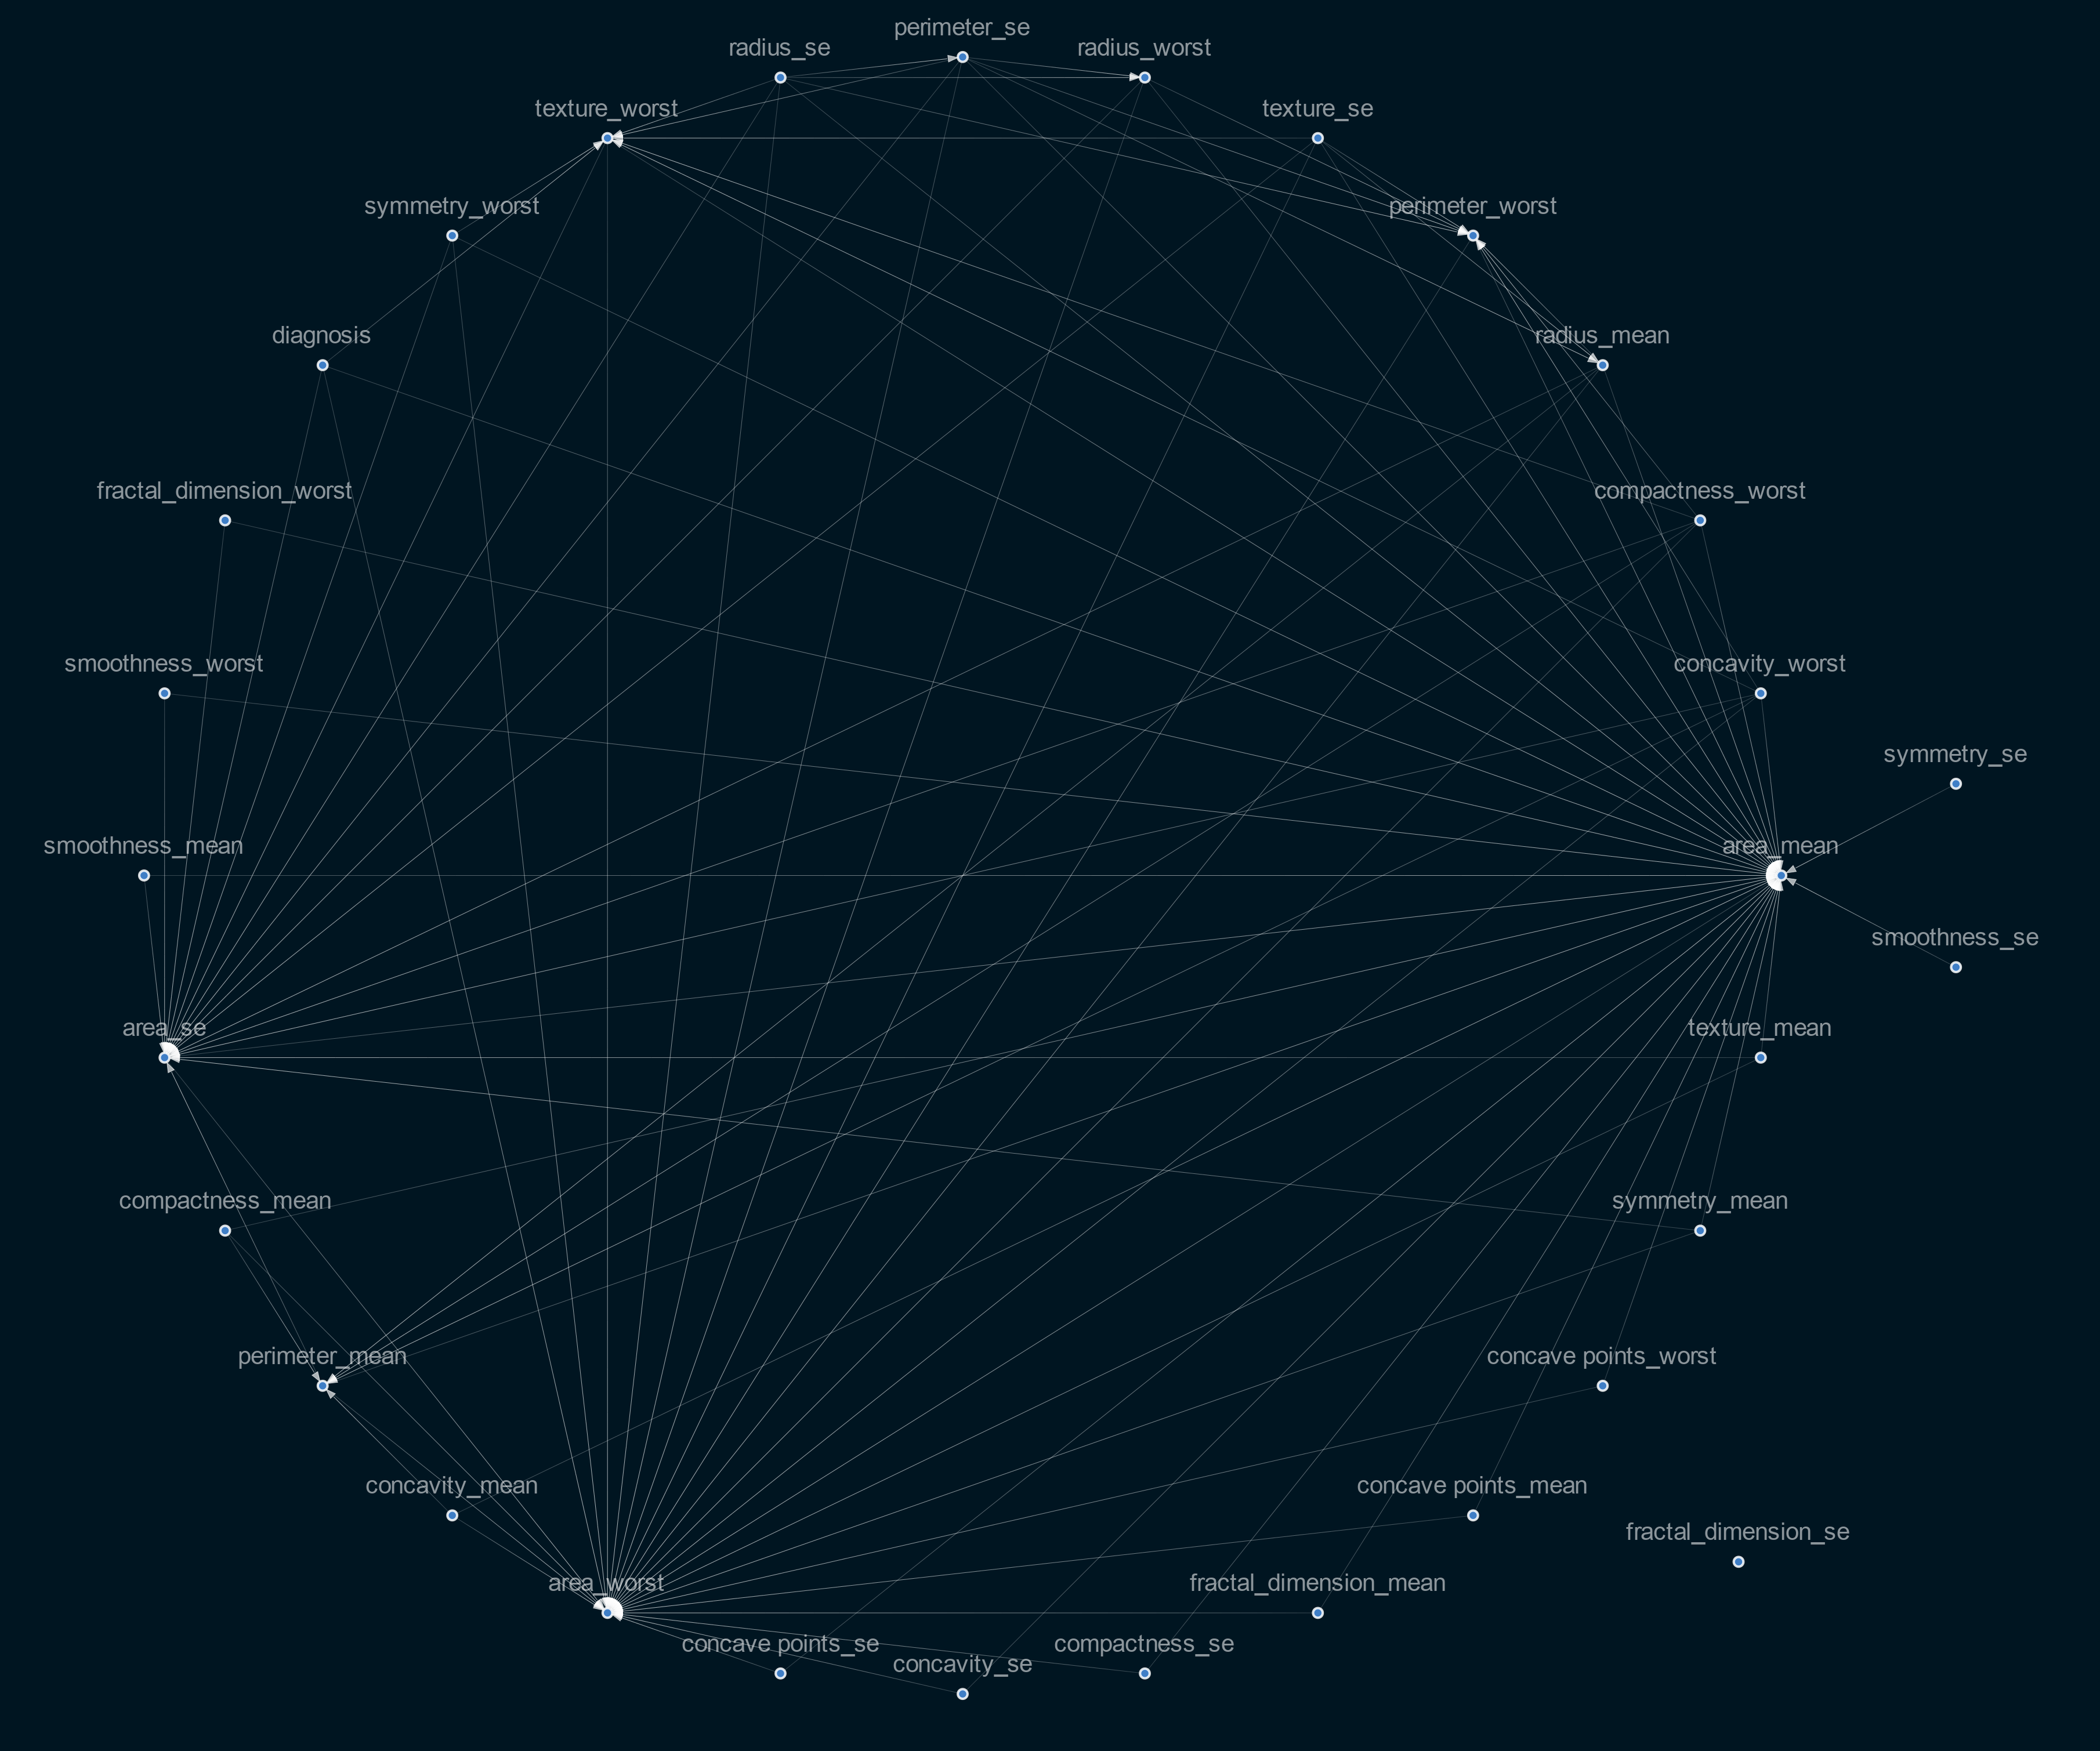

In [12]:
seventy_cg.show_graph(size=50, scale=0.8, prog="circo", image_name="all_cols_70_pct")

### calculate similarity with baseline graph

In [13]:
CausalGraph.jaccard_similarity(ts_all_cg.sm.edges, seventy_cg.sm.edges)

0.899

### calculate similarity with fourty_pct graph

In [14]:
CausalGraph.jaccard_similarity(fourty_cg.sm.edges, seventy_cg.sm.edges)

0.833